In [93]:
import numpy as np
import pandas
import pandas as pd
import pycascades as pc
import networkx as nx
import matplotlib.pyplot as plt
import importlib

# I documented the following files:
# core/evolve.py
# core/evolve_sde.py

In [197]:
# characteristic time scales
ts = pc.earth_system.Timing()
ts = ts.timescales()

# first line of the random within-range values for the tipping temperatures and coupling strengths
# tipping temperatures
T = [2.241961283016736, 4.690622821301434, 1.4159411909227195, 4.102480797163987]
# coupling strengths
c = np.array([0.19309698390040142, 0.5780331277664367, 0.31200890950255655, 0.11975402592062362, 0.1316699858272922, 0.27059650762351767, 0.3715199043381331])

In [198]:
# earth system is a class that holds the coupling constants and tipping temperatures
# for the network between AMOC, AMAZ, GIS, WAIS
es  = pc.earth_system.Earth_System(*ts, *T, *(0*c))
print(es.__dict__)

{'_gis_time': 98.0, '_thc_time': 6.0, '_wais_time': 48.0, '_amaz_time': 1.0, '_limits_gis': 2.241961283016736, '_limits_thc': 4.690622821301434, '_limits_wais': 1.4159411909227195, '_limits_amaz': 4.102480797163987, '_pf_wais_to_gis': 0.0, '_pf_thc_to_gis': 0.0, '_pf_gis_to_thc': 0.0, '_pf_wais_to_thc': 0.0, '_pf_gis_to_wais': 0.0, '_pf_thc_to_wais': 0.0, '_pf_thc_to_amaz': 0.0}


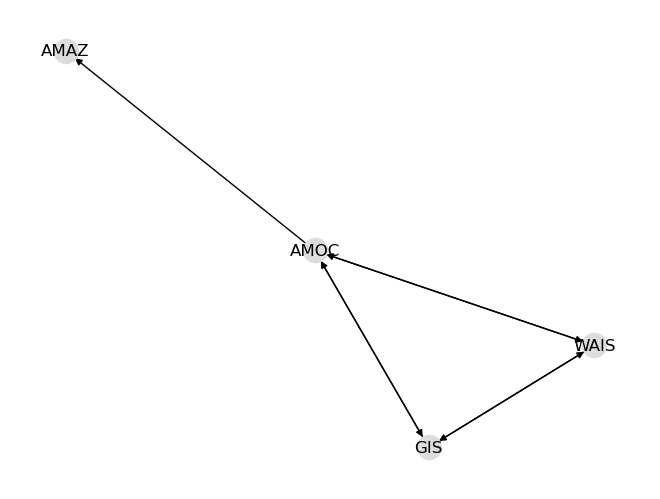

In [200]:
# The Earth_System's earth_network method generates an instance of the class tipping_network
# that extends networkx's DiGraph (directed graph)
#
# parameter explanation:
# GMT:      global mean temperature for the cusp bifurcation
# strength: overall modulation of the coupling strength
# kk0:      sign of the WAIS -> AMOC coupling
# kk1:      sign of the AMOC -> AMAZ coupling
# both values can be set to one and the sign can instead be used given in the coupling constants above

net = es.earth_network(1.5, 0.5, 0, 0)

# ordering of the elements is hard coded in tipping_network class
nx.draw(net, labels={0:"GIS", 1:"AMOC", 2:"WAIS", 3:"AMAZ"}, node_color="#DDDDDD")

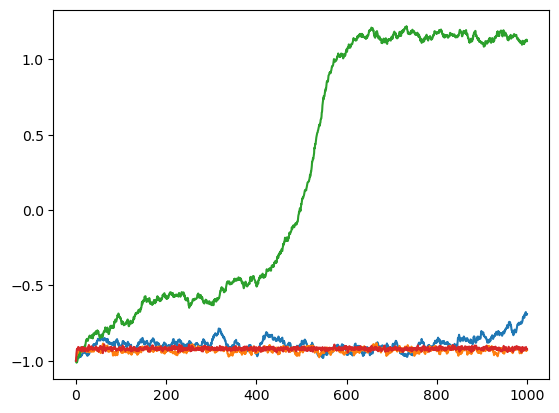

In [266]:
ev = pc.evolve_sde(net, initial_state=np.repeat(-1, 4))
ev.integrate(0.5, 1000, sigma=0.01)

T, Y = ev.get_timeseries()
plt.plot(T, Y)
plt.show()

In [267]:
# deterministic part of the system
F = np.array([net.f(y, t) for t, y in zip(T, Y)])
# random part of the system
G = np.diff(Y, axis=0) - F[0:-1, :]*np.diff(T)[0]

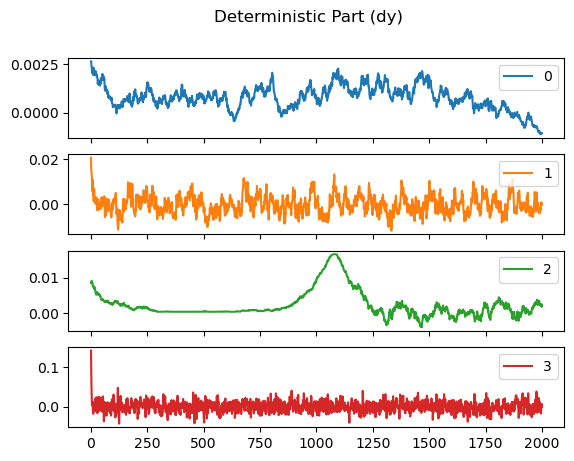

In [274]:
pd.DataFrame(F).plot(subplots=True)
plt.suptitle("Deterministic Part (dy)")
plt.show()

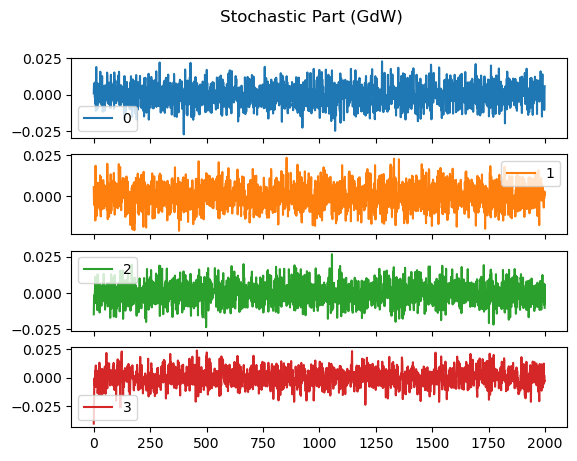

In [269]:
pd.DataFrame(G).plot(subplots=True)
plt.suptitle("Stochastic Part (GdW)")
plt.show()